In [5]:
from __future__ import print_function
from __future__ import division

from collections import OrderedDict
import os
import sys
import warnings

import argparse
import logging
import h5py as h5
import numpy as np
import pandas as pd
import scipy.io

import six
from six.moves import range
import csv
import math as ma
from sklearn.metrics import roc_auc_score, confusion_matrix, average_precision_score,roc_curve,auc,precision_recall_curve
from keras.preprocessing import sequence
from keras.optimizers import RMSprop,Adam, Adadelta, Nadam, Adamax, SGD, Adagrad
from keras.models import Sequential
from keras.layers.core import  Dropout, Activation, Flatten
from keras.regularizers import l1,l2,l1_l2
from keras.constraints import maxnorm
#from keras.layers.recurrent import LSTM, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Conv1D, MaxPooling1D, Dense, LSTM, Bidirectional
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Using TensorFlow backend.


In [8]:
h5filename = "histonemodTF_resample_ncl.h5"
h5file = h5.File(h5filename,'r')
input_features = h5file['input/H3K4me3_RPKM']
output_H3K4me3 = h5file['output/H3K4me3']
print(input_features.shape)
print(output_H3K4me3.shape)  

(26858, 30)
(26858,)


In [9]:
input_features = np.array(input_features)
output_H3K4me3 = np.array(output_H3K4me3)
output_H3K4me3_reshape = output_H3K4me3.reshape(len(output_H3K4me3),1)
print(output_H3K4me3.shape)

(26858,)


In [10]:
X = input_features
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X)
print(X_embedded)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 26858 samples in 0.157s...
[t-SNE] Computed neighbors for 26858 samples in 62.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 26858
[t-SNE] Computed conditional probabilities for sample 2000 / 26858
[t-SNE] Computed conditional probabilities for sample 3000 / 26858
[t-SNE] Computed conditional probabilities for sample 4000 / 26858
[t-SNE] Computed conditional probabilities for sample 5000 / 26858
[t-SNE] Computed conditional probabilities for sample 6000 / 26858
[t-SNE] Computed conditional probabilities for sample 7000 / 26858
[t-SNE] Computed conditional probabilities for sample 8000 / 26858
[t-SNE] Computed conditional probabilities for sample 9000 / 26858
[t-SNE] Computed conditional probabilities for sample 10000 / 26858
[t-SNE] Computed conditional probabilities for sample 11000 / 26858
[t-SNE] Computed conditional probabilities for sample 12000 / 26858
[t-SNE] Computed conditional probabilities for s

In [13]:
#combine the label with input dna
y = np.array(output_H3K4me3, dtype='int8')
y_reshape = y.reshape(len(y),1)
input_features_label = np.concatenate((X_embedded,y_reshape), axis=1)
H3K4me3_df = pd.DataFrame(y)
pos_label= H3K4me3_df.loc[H3K4me3_df.iloc[:,0]==1]
pos_label_ix = np.array(pos_label.index)
neg_label = H3K4me3_df.loc[H3K4me3_df.iloc[:,0]==0]
neg_label_ix = np.array(neg_label.index)
pos_sam_H3K4me3 = input_features_label[pos_label_ix,:]
neg_sam_H3K4me3 = input_features_label[neg_label_ix,:]
X_pos = pos_sam_H3K4me3[:,0:2]
X_neg = neg_sam_H3K4me3[:,0:2]
print(pos_sam_H3K4me3.shape)
print(neg_sam_H3K4me3.shape)
print(X_pos.shape)
print(X_neg.shape)
 

(11865, 3)
(14993, 3)
(11865, 2)
(14993, 2)


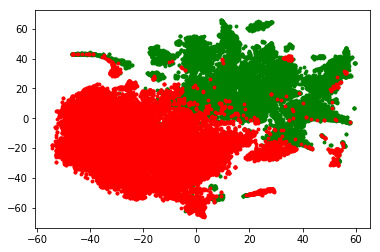

In [18]:
#idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]), idx_resampled)
plt.scatter(X_pos[:,0], X_pos[:,1],marker='o',s=8, c='green')
plt.scatter(X_neg[:,0], X_neg[:,1],marker='o',s=8, c='red')
# make nice plotting
#plt.show()
plt.show()
 